In [1]:
from collections import Counter
import pprint


## Read File in

In [2]:
!ls  #访谈记录.txt

simsun.ttf	   stopword.txt  分词01.ipynb
single_word.ipynb  访谈记录.txt  分词&彩色词云.ipynb


In [3]:
filename = "访谈记录.txt"
with open(filename) as f:
 mytext = f.read()

print(mytext)

﻿角色1：院里一直都非常重视大家职业发展，包括来我们医院之后的一个工作体验，大家来医院有一年了，医院也是希望大家有一个面对面的沟通交流，把大家心里这一年来的工作的感受，还有你们的疑惑，或者希望我们从医院层面能给大家包括人事和职业发展方面的一些困惑，解答或者解决，都提出来。咱们是一个非正式不是官方的，咱们自己的一个交流，有什么都可以跟我们说。然后我就是想粗略的问几个问题， 因为大家特别忙，咱们抓紧时间。
角色2：因为今年又开始新员工培训了，如果我们有比如做的不全面，你们认为新员工培训应该加一些什么内容，我们就尽快地给加进去。还有就是刚才林老师（音）说的一年以来你们还有其他的想法也可以说。
角色1：那我先问一下就是咱们有什么都可以说，不一定说非得点名，就是咱入职一年了，你们谈一谈自己这个参加新员工培训当时的一个感受，还有没有印象？不管是内容还是形式上，你们回想一下，一年前当时参加培训，从那种形式上有没有可以我们改进的，或者你们觉得还有哪些内容可以加进来的，还有哪些需要我们再丰富的都可以跟我们说。那个班长先说吧。
角色3：我是想着那个加的内容，我觉得后面我们开展工作，有的时候不管是内科外科、麻醉这些个辅助科，还有护士他们都是一样，就是其实上下相差一年他们有的一些经验也挺关键的。当时其实是叫了几个主治老师过去坐下交流会谈，但是我觉得可以叫几个大一级或者大两级的这些人，他们说的就会特别贴近我们，比如说呼吸科或者是什么科，就是介绍一下工作特点这些，而且是类似于全开放没有领导在场，大家就互相交流，越是这样，可能就是大家就越放得开去问。我们虽然经过新员工培训，但真正在进入临床之后，我们也是用了好久才去熟悉一些事物。如果原来就在这个咱们医院参加实习，当时就会很快就熟悉了，但是原来不是在这个医院的话，有一些陌生，尤其是再去下一个科，又要去熟悉。但如果是在这之前就给大家有一些这样的交流的机会，去了另一个科可能就不会很陌生，然后能很快就进入角色，而且同一届的可能就关心的问题是差不多的。比如说有的时候可能主治老师和副主任医师老师他们和我们关注的已经不太一样了，也有的时候他们在讲的时候我们想提问却不敢说，但其实要是真正放开了，我觉得肯定大家也有挺多问题的。
角色4：那我们今年这么办你愿意参加吗？你现在就是老员工，对吧。你正好是圆满一年的老员工，可以跟他们交流交流。
角色3：我觉得多叫几个人，各

## Break words with Jieba

In [15]:
import jieba
mytext = " ".join(jieba.cut(mytext))

print(mytext)

﻿   角色   1   ：   院里   一直   都   非常重视   大家   职业   发展   ，   包括   来   我们   医院   之后   的   一个   工作   体验   ，   大家   来   医院   有   一年   了   ，   医院   也   是   希望   大家   有   一个   面对面   的   沟通交流   ，   把   大家   心里   这   一年   来   的   工作   的   感受   ，   还有   你们   的   疑惑   ，   或者   希望   我们   从   医院   层面   能   给   大家   包括   人事   和   职业   发展   方面   的   一些   困惑   ，   解答   或者   解决   ，   都   提出   来   。   咱们   是   一个   非正式   不是   官方   的   ，   咱们   自己   的   一个   交流   ，   有   什么   都   可以   跟   我们   说   。   然后   我   就是   想   粗略   的   问   几个   问题   ，       因为   大家   特别   忙   ，   咱们   抓紧时间   。   
   角色   2   ：   因为   今年   又   开始   新   员工   培训   了   ，   如果   我们   有   比如   做   的   不   全面   ，   你们   认为   新   员工   培训   应该   加   一些   什么   内容   ，   我们   就   尽快   地   给   加进去   。   还有   就是   刚才   林   老师   （   音   ）   说   的   一年   以来   你们   还有   其他   的   想法   也   可以   说   。   
   角色   1   ：   那   我   先   问   一下   就是   咱们   有   什么   都   可以   说   ，   不   一定   说   非得   点名   ，   就是   咱入   职   一年   了   ，   你们   谈一谈   自己   这个   

In [6]:
counter = Counter(mytext)
pprint.pprint(counter.most_common(10))

[(' ', 9905),
 ('，', 666),
 ('是', 500),
 ('的', 413),
 ('。', 347),
 ('个', 334),
 ('就', 328),
 ('\n', 312),
 ('角', 309),
 ('色', 308)]


## Break with PKUSEG

In [9]:
import pkuseg
from collections import Counter
import pprint

content = []
with open("访谈记录.txt", encoding="utf-8") as f:
    content = f.read()

lexicon = ['吃','带','角色1','角色2','角色3','角色4','角色5','角色6','角色7','角色8','角色9','角色10','角色11','角色12','角色13','角色14']  #
seg = pkuseg.pkuseg(user_dict=lexicon)  # 加载模型，给定用户词典
text = seg.cut(content)

stopwords = []

with open("stopword.txt", encoding="utf-8") as f:
    stopwords = f.read()

new_text = []

for w in text:
    if w not in stopwords:
        new_text.append(w)

counter = Counter(new_text)
pprint.pprint(counter.most_common(50))



[('医院', 40),
 ('科', 35),
 ('老师', 31),
 ('培训', 29),
 ('住院', 26),
 ('科室', 25),
 ('护士', 23),
 ('吃', 21),
 ('轮转', 20),
 ('带', 19),
 ('大夫', 16),
 ('工作', 15),
 ('希望', 14),
 ('科里', 14),
 ('时间', 13),
 ('入职', 13),
 ('开通', 13),
 ('内科', 12),
 ('班', 11),
 ('里边', 11),
 ('找', 11),
 ('安排', 10),
 ('规培', 10),
 ('发展', 9),
 ('交流', 9),
 ('员工', 9),
 ('内容', 9),
 ('阶段', 9),
 ('医生', 9),
 ('收入', 9),
 ('协和', 8),
 ('名字', 8),
 ('系统', 8),
 ('中级', 8),
 ('参加', 7),
 ('那种', 7),
 ('关心', 7),
 ('教', 7),
 ('定科', 7),
 ('护理部', 7),
 ('饭', 7),
 ('职业', 6),
 ('解决', 6),
 ('外科', 6),
 ('关键', 6),
 ('熟悉', 6),
 ('护理', 6),
 ('去年', 6),
 ('专业', 6),
 ('权限', 6)]


In [18]:
print(type(new_text))

<class 'list'>


In [22]:
str(new_text)

"['\\ufeff', '院里', '重视', '职业', '发展', '医院', '工作', '体验', '医院', '医院', '希望', '面对面', '沟通', '交流', '工作', '感受', '疑惑', '希望', '医院', '层面', '人事', '职业', '发展', '困惑', '解答', '解决', '提', '非正式', '官方', '交流', '粗略', '忙', '抓紧', '时间', '员工', '培训', '员工', '培训', '内容', '林', '老师', '音', '想法', '点名', '入职', '谈', '谈', '参加', '员工', '培训', '感受', '印象', '不管是', '内容', '形式', '回想', '参加', '培训', '那种', '形式', '改进', '内容', '班长', '内容', '工作', '内科', '外科', '麻醉', '这些个', '辅助科', '护士', '相差', '经验', '关键', '主治', '老师', '坐下', '交流', '会谈', '大一', '贴近', '呼吸科', '科', '介绍', '工作', '类似于', '开放', '领导', '在场', '交流', '开去', '员工', '培训', '临床', '好久', '熟悉', '事物', '医院', '参加', '实习', '很快', '熟悉', '医院', '陌生', '尤其是', '科', '熟悉', '交流', '机会', '科', '陌生', '很快', '关心', '主治', '老师', '副', '主任医师', '老师', '关注', '提问', '放开', '参加', '员工', '正好', '圆满', '员工', '交流', '交流', '科室', '正好', '将来', '员工', '交流', '实习', '医院', '差别', '科', '差别', '医院', '协和', '科', '提前', '经验', '交流', '培训', '后期', '临床', '工作', '医院', '安排', '缺少', '一目了然', '规划', '员工', '证', '培训', '发展', '工作', '提前', '告知', '希望', '列表', '性质', '工作', '挺重', '时间'

## Make word cloud

In [17]:
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


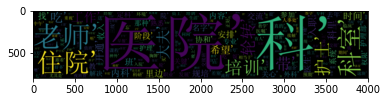

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path="simsun.ttf"
                      ,width=4000
                      ,height=800
                     ).generate(str(new_text))
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(font_path="simsun.ttf", background_color="white", repeat=True, mask=mask)
wc.generate(mytext)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<Figure size 640x480 with 1 Axes>